# Lab 3-2 지도 학습 머신러닝 프로그램 수정

## 라이브러리 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# 한글 처리
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


## 데이터 준비

In [2]:
# 0-34 인덱스 까지는 도미, 나머지 14개는 빙어
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14

### 데이터를 Numpy 배열로 변환

In [4]:
input_array = np.array(fish_data)
target_array = np.array(fish_target)

In [5]:
input_array.shape

(49, 2)

### Numpy 배열을 섞어 편향이 제거된 배열 생성

In [26]:
np.random.seed(50)
index = np.arange(49)
np.random.shuffle(index)

In [27]:
print(index)

[34  1 44 40  8 18 16 24 19 23 12 38 13 35 25 47 15 36 29  0  9 10 21 17
 46 20 39 43 26 27 28  3 14 42  7 31  2  5 22 41 37  6  4 30 33 45 11 32
 48]


In [28]:
train_input = input_array[index[:35]]
target_input = target_array[index[:35]]

In [29]:
test_input = input_array[index[35:]]
test_target = target_array[index[35:]]

### 데이터 확인

{'whiskers': [<matplotlib.lines.Line2D at 0x217417a2240>,
 'caps': [<matplotlib.lines.Line2D at 0x217417a27e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217417a1fa0>,
 'medians': [<matplotlib.lines.Line2D at 0x217417a2cf0>,
 'fliers': [<matplotlib.lines.Line2D at 0x217417a2f60>,
 'means': []}

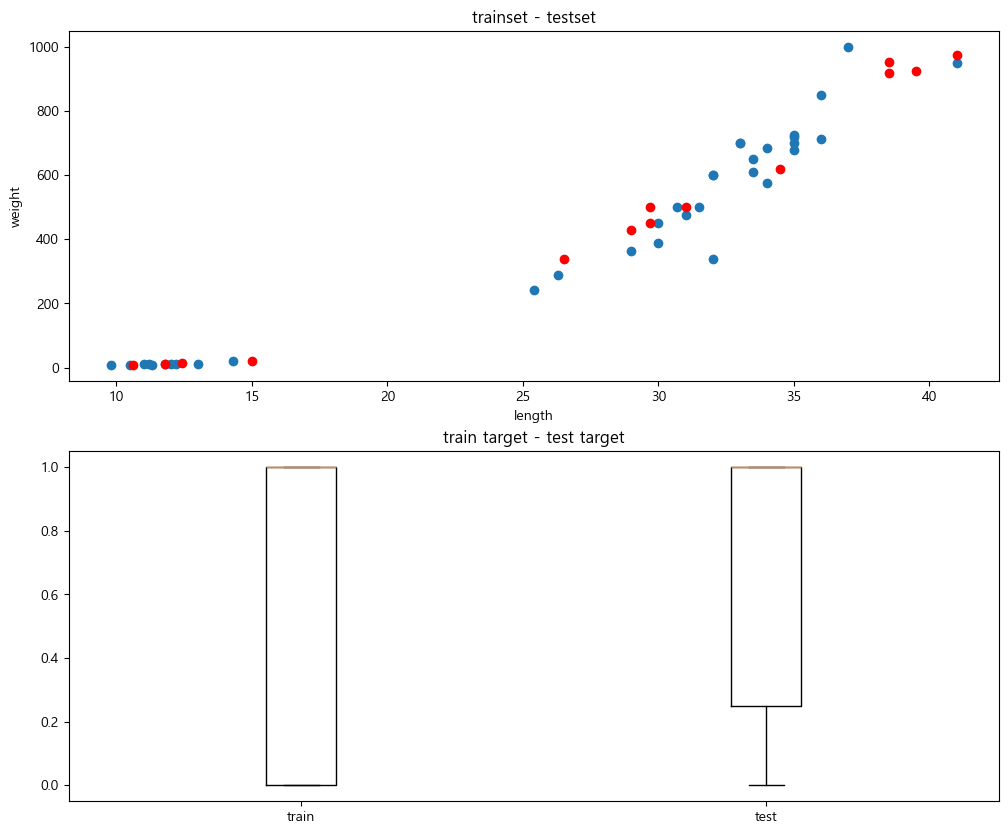

In [50]:
columns = ['length', 'weight']
df_train_input = pd.DataFrame(train_input, columns=columns)
df_test_input = pd.DataFrame(test_input, columns=columns)

fig = plt.figure(figsize=(12,10))

# add_subplot(행수, 열수, 인덱스)
ax1 = fig.add_subplot(2,1,1)
ax1.set_title('trainset - testset')
ax2 = fig.add_subplot(2,1,2)
ax2.set_title('train target - test target')

ax1.scatter(x=df_train_input.length, y=df_train_input.weight)
ax1.scatter(x=df_test_input.length, y=df_test_input.weight, color='red')
ax1.set_xlabel('length')
ax1.set_ylabel('weight')
ax2.boxplot(x=[target_input, test_target], tick_labels=['train','test'])

## 모델 생성, 훈련 및 평가

### K-Nearest Neighbor 알고리즘 모델

In [31]:
kn = KNeighborsClassifier()

### 훈련

In [ ]:
kn.fit(train_input, target_input)

KNeighborsClassifier()

### 평가

In [36]:
kn.score(test_input, test_target)

1.0

## 새 데이터로 평가

In [39]:
# 도미로 평가되어야 하는 데이터
kn.predict([[30,600]])

array([1])

In [40]:
# 빙어로 평가되어야 하는 데이터
kn.predict([[15,19.9]])

array([0])

## 문제점

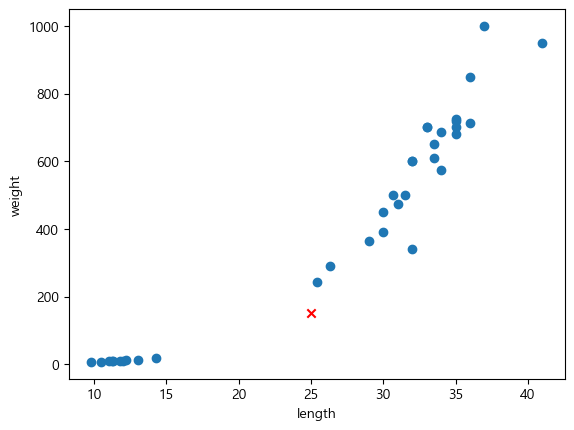

In [55]:
columns = ['length', 'weight']
df_train_input = pd.DataFrame(train_input, columns=columns)
df_test_input = pd.DataFrame(test_input, columns=columns)


plt.scatter(x=df_train_input.length, y=df_train_input.weight)
plt.scatter(25, 150, marker="x", color="red")
plt.xlabel("length")
plt.ylabel("weight")

plt.show()

In [56]:
# 도미로 평가되어야 하는 데이터
kn.predict([[25,150]])

array([0])